# Table of contents
1. [Classification](#introduction)
2. [Machine Learning Classification models](#listofmodels)
    1. [Logistic Regression](#LogisticRegression)
    2. [K-Nearest Neighbors (K-NN)](#KNN)
    3. [Support Vector Machine](#SVM)
    4. [Kernel SVM](#K-SVM)
    5. [Naive Bayes](#NB)
    6. [Decision Tree Classification](#DecisionTreeClassification)
    6. [Random Forest Classification](#RandomForestClassification)
3. [Other](#other)


## Classification <a name="introduction"></a>

Classification is a Machine Learning technique to identify the category of new observations based on training data. Example: 
1. Predict which employees are likely to stay to leave
2. classify emails into important, General, Updates or spam
3. Classify if the image is of Dog or Cat

## Machine Learning Classification models: <a name="listofmodels"></a>

##### Supervised 

### Logistic Regression <a name="LogisticRegression"></a>
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. [https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,%2Fno%2C%20and%20so%20on.]

<img src="https://www.kdnuggets.com/wp-content/uploads/building-predictive-models-logistic-regression-in-python_01.png">

Logic: Logistic regression curve or sigmoid curve

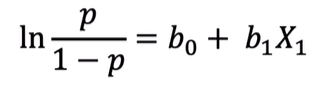

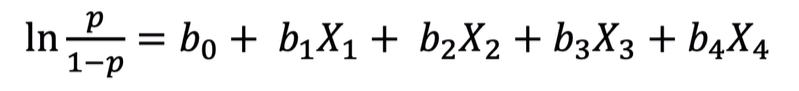

Best fitting cure is derived by Maximising likelihood. Likelihood basically is for all yes observation, multiply YES Probabolity and for all NO observation multiply (1 - No probability) and then multiply both numbers.

In [23]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics


# Importing the dataset
dataset = pd.read_csv('./resources/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [24]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
# Create your classifier here
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

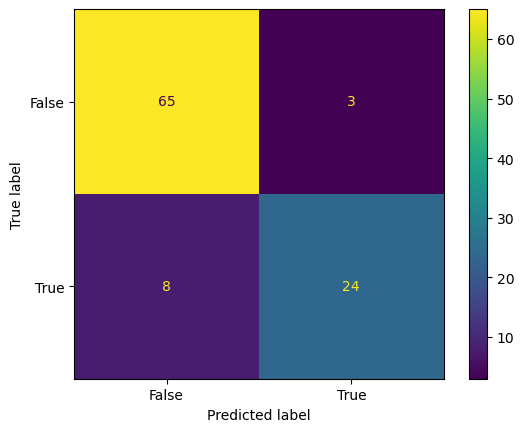

In [28]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

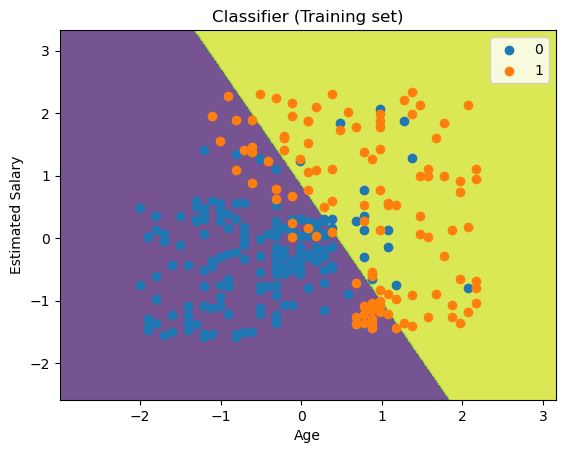

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75) #, cmap = ListedColormap(('r', 'green'))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               label = j) #c = ListedColormap(('red', 'green'))(i),
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

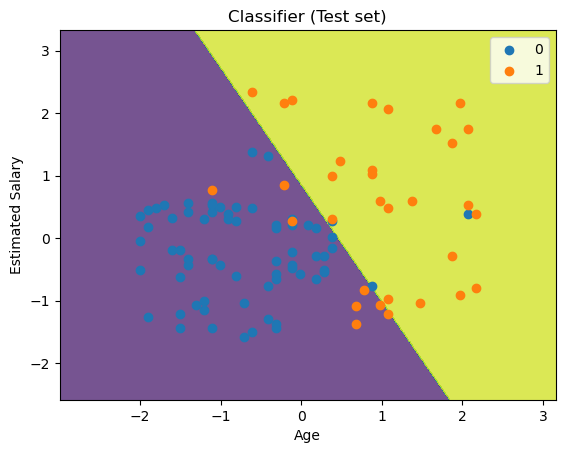

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75) #, cmap = ListedColormap(('red', 'green'))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
             label = j) # c = ListedColormap(('red', 'green'))(i), 
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### K-Nearest Neighbors (K-NN) <a name="KNN"></a>

##### Supervised 

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/#:~:text=The%20K%2DNearest%20Neighbors%20(KNN)%20algorithm%20is%20a%20popular,have%20similar%20labels%20or%20values.

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

1. Load the data
2. Initialize K to your chosen number of neighbors
3. Calculate the distance between the test record and all the observation from the data. Here there are various methods to measure distance and Euclidean distance is one famous example.
4. Pick the first K smallest entries from the all the distances calculated.
5. Get the labels of the selected K entries
6. Result
    1. If regression, return the mean of the K labels
    2. If classification, return the mode of the K labels

Note, this algorith remebers the entire dataset

### Support Vector Machine (SVM)  <a name="SVM"></a>

https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-support-vector-machine-svm/

<img src="https://editor.analyticsvidhya.com/uploads/567891.png">

In the SVM algorithm, we plot each observation as a point in an n-dimensional space (where n is the number of features in the dataset). Our task is to find an optimal hyperplane that successfully classifies the data points into their respective classes.This Hyperpalne is called Maximum Margin Hyperplane, which is also called Maximum Margin classifier. Here the idea is to maximize the distance between support vectors and the hyperplane, where support vectores are edge/extreme points in the dataset.

A hyperplane is a decision boundary that differentiates the two classes in SVM. A data point falling on either side of the hyperplane can be attributed to different classes. The dimension of the hyperplane depends on the number of input features in the dataset. If we have 2 input features the hyper-plane will be a line. likewise, if the number of features is 3, it will become a two-dimensional plane. 

### Kernel SVM <a name="K-SVM"></a>
http://diamondclover.com/kernal-svm.html

<p>Assumption of normal SVM is that the data is linearly seprable data. Kernal SVM is used in cases where the dataset is not linearily seperable. This can be seen in the example below where clearlily the dataset is seperable but there is no one line that will be able to do it well.The basic concept is simple. We map the dataset to higher dimension, where it is possible to linealiy sepreate the dataset. We then find out seperation, invoke the SVM algorthm to build our discision boundary and then finally return it to our original dimension.</p>

<img src="https://lh3.googleusercontent.com/proxy/3D7uqg8lR2Ox4f2Day21c0fBQancUiXr4EaFwTzL9HWKC2bnVnk40ogOz3hmQb2eHk3klQGnEdo-blIosypD5Dh-iqjTj0jkwO8I8S2bfzo28ya9dy33vdsJnFaS6A">

<img src="http://diamondclover.com/images/machine-learning/classification/kernalsvm1.png">

so the solution is to look at the data with higher-dimentional space

Example 1:
<img src="http://diamondclover.com/images/machine-learning/classification/kernalsvm3.png">

When projected to higher dimension becomes

<img src="http://diamondclover.com/images/machine-learning/classification/kernalsvm4.png">

thus we have data that is linearly seprables

Example 2:
    
<img src="http://diamondclover.com/images/machine-learning/classification/kernalsvm5.png">
    
Non-linearly seprable data when projected to higher dimension becomes linearly seprables

<h2 id="the-kernal-trick">The Kernal trick</h2>

<h3 id="the-gaussian-rbf-kernel">The Gaussian RBF Kernel</h3>

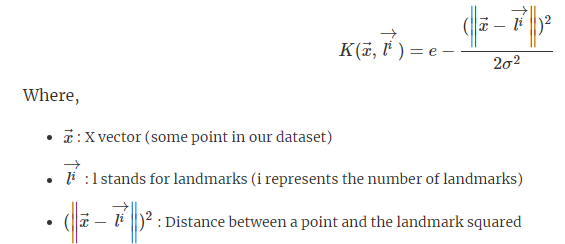

<p>The landmark is placed directly at the center of the dataset and is used to calculate the distance to a point. In the picture below the landmark is represented by a red dot. The red and green plus signs represent different data points.</p>

<p><img src="http://diamondclover.com/images/machine-learning/classification/rbf1.png" alt="SVM" style="width:550px;height:246px;" /></p>

<p>To understand how this function works we’ll walk through it. Looking at the distance between the landmark and the red point we see that the <script type="math/tex">(\left \| \vec{x}- \vec{l^{i}} \right \|)</script>. Squaring this value we get an even larger value. Assuming sigma is large as well the entire exponent is a large value. The negative of a large exponent is a number very close to zero on the y axis. Looking at the point green point on we see that difference is smaller and so the exponent itself will be smaller. The negative of a smaller value will be further from zero generating for us the graph above.</p>

<p>To understand this better, let us look at the the dataset to see how the Gaussian RBF function works.</p>

<p><img src="http://diamondclover.com/images/machine-learning/classification/rbf2.png" alt="SVM" style="width:550px;height:246px;" /></p>

<p>The landmark is placed at the center of the green dataset. Once the landmark is selected a circumference around the dataset is chosen based on the dataset. As sigma increases, the circumference increases and as it decreases so does the circumference. The way it works is put simpply, values outside the circle are given a value 0 (or very close) and values within the circle are given a value above zero.</p>

<p>This concept let’s us solve more complicated dataset. For example, in the dataset below, we can apply two landmarks.</p>

<p><img src="http://diamondclover.com/images/machine-learning/classification/rbf3.png" alt="SVM" style="width:550px;height:246px;" /></p>

<p>Because of how the Gaussian Equation works, the two landwarks don’t really interfere with each other, given a proper sigma value. So that means we can basically just take two kernal functions and add them up to get our decision boundary.</p>

<p><img src="http://diamondclover.com/images/machine-learning/classification/rbf4.png" alt="SVM" style="width:550px;height:246px;" /></p>

<p>This example however is simplified. In reality we should get the green to be greater <strong>or equal</strong> to zero and the red is <strong>less than</strong> zero.</p>

<h2 id="types-of-kernal-functions">Types of Kernal Functions</h2>

<p><img src="http://diamondclover.com/images/machine-learning/classification/kernalfun1.png" alt="SVM" style="width:550px;height:246px;" /></p>

<h2 id="building-an-svm-not-linearily-seperable">Building an SVM (Not linearily seperable)</h2>

<p>Create classifer</p>

<p><code class="highlighter-rouge">kernal types</code> : linear, poly, rbf</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="kn">from</span> <span class="nn">sklearn.svm</span> <span class="kn">import</span> <span class="n">SVC</span>
<span class="n">classifier</span> <span class="o">=</span> <span class="n">SVC</span><span class="p">(</span><span class="n">kernel</span> <span class="o">=</span> <span class="s">'rbf'</span><span class="p">,</span> <span class="n">random_state</span> <span class="o">=</span> <span class="mi">0</span><span class="p">)</span>
<span class="n">classifier</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X_train</span><span class="p">,</span> <span class="n">y_train</span><span class="p">)</span>
</code></pre></div></div>

### Naive Bayes <a name="NB"></a>

http://diamondclover.com/bayes.html

### Decision Tree Classification <a name="DecisionTreeClassification"></a>

http://diamondclover.com/dtc.html

### Random Forest Classification <a name="RandomForestClassification"></a>

## Other <a name="other"></a>